#1) Delivery_time -> Predict delivery time using sorting time
# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')



In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
dataset1 = pd.read_csv('delivery_time.csv')
dataset1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dataset1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
dataset1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
# rename the column
dataset1 = dataset1.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
dataset1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#EDA and Visualization

In [14]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [12]:
print(dataset1.head())

   Delivery_Time  Sorting_Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [13]:
print(dataset1.describe())

       Delivery_Time  Sorting_Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


In [16]:
# checking for null values
dataset1.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [17]:
# checking for duplicate values
dataset1[dataset1.duplicated()].shape


(0, 2)

In [19]:
dataset1[dataset1.duplicated()]

,Delivery_Time,Sorting_Time


Plotting the data to check for outliers

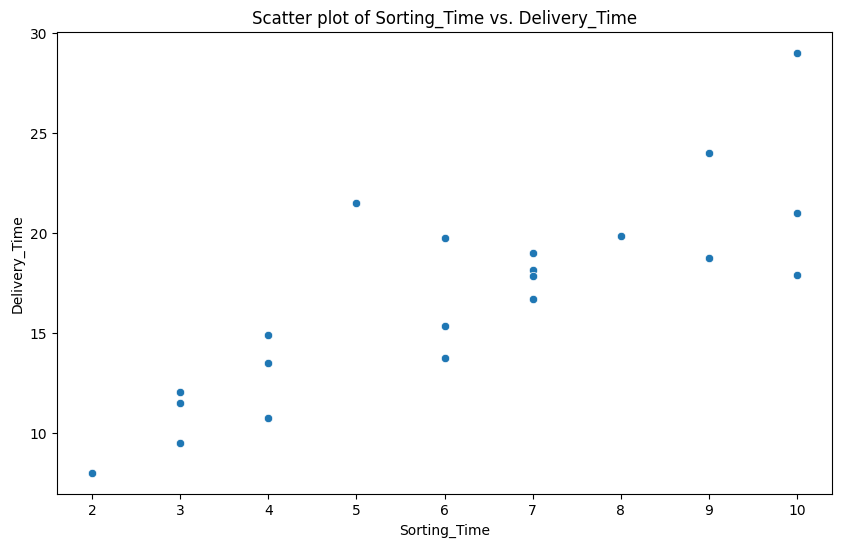

In [23]:
# Scatter plot for Sorting_Time vs. Delivery_Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sorting_Time', y='Delivery_Time', data=dataset1, palette='viridis')
plt.title('Scatter plot of Sorting_Time vs. Delivery_Time')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.show()


Text(0.5, 1.0, 'Histogram of Delivery_Time')

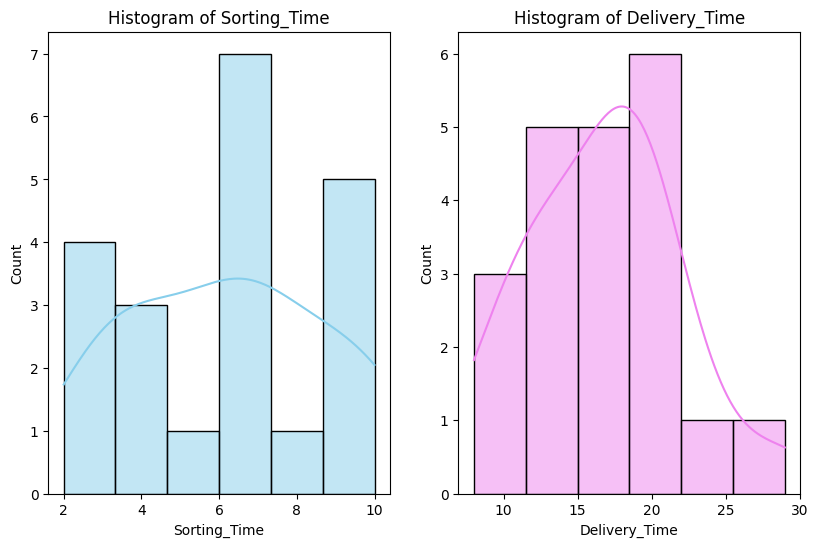

In [27]:
# Create histograms for Sorting_Time, Delivery_Time
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
sns.histplot(dataset1['Sorting_Time'], kde=True, color='skyblue')
plt.title('Histogram of Sorting_Time')
plt.subplot(1,3,2)
sns.histplot(dataset1['Delivery_Time'],kde=True, color='violet')
plt.title('Histogram of Delivery_Time')


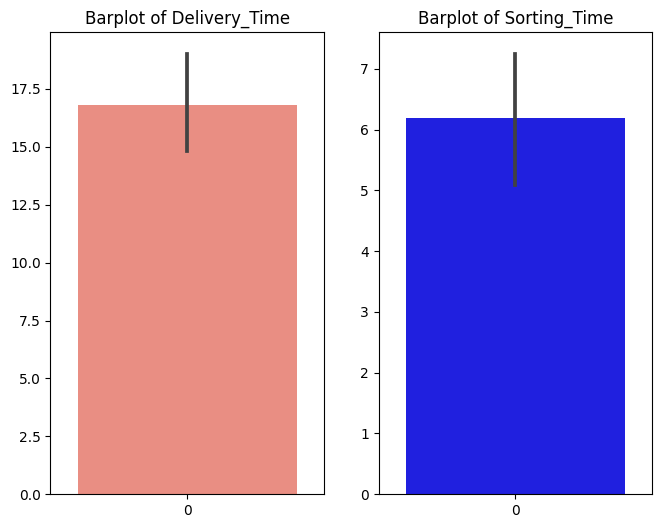

In [40]:
# Create Barchart for Sorting_Time, Delivery_Time
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot(dataset1['Delivery_Time'], color='salmon')
plt.title('Barplot of Delivery_Time')
plt.subplot(1,3,2)
sns.barplot(dataset1['Sorting_Time'], color='Blue')
plt.title('Barplot of Sorting_Time')
plt.show()

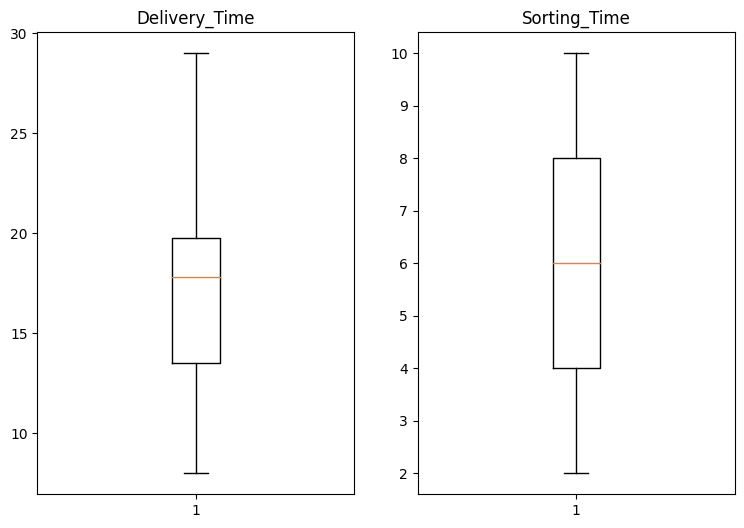

In [39]:
# Create Boxplot for Sorting_Time, Delivery_Time
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dataset1['Delivery_Time'])
plt.title('Delivery_Time')
plt.subplot(122)
plt.boxplot(dataset1['Sorting_Time'])
plt.title('Sorting_Time')
plt.show()

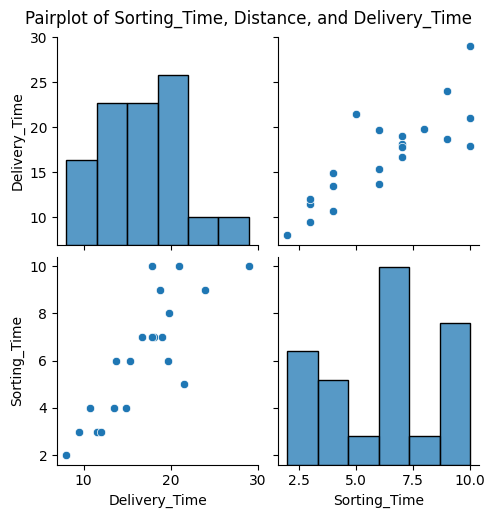

In [41]:
# Pairplot to visualize relationships between variables
sns.pairplot(dataset1, height=2.5)
plt.suptitle('Pairplot of Sorting_Time, Distance, and Delivery_Time', y=1.02)
plt.show()

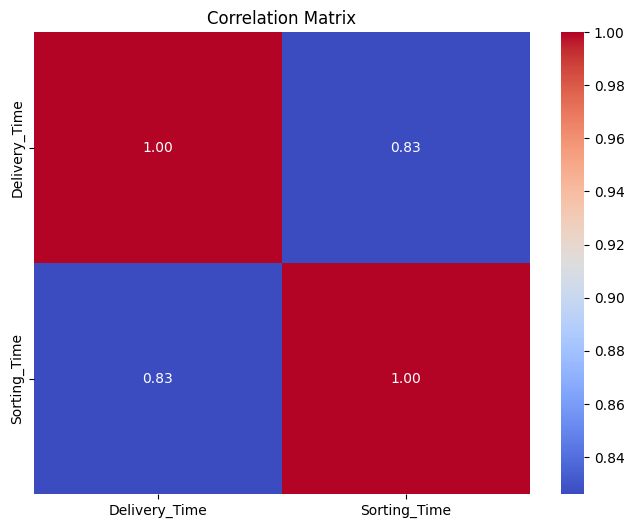

In [42]:
# Correlation heatmap
correlation_matrix = dataset1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

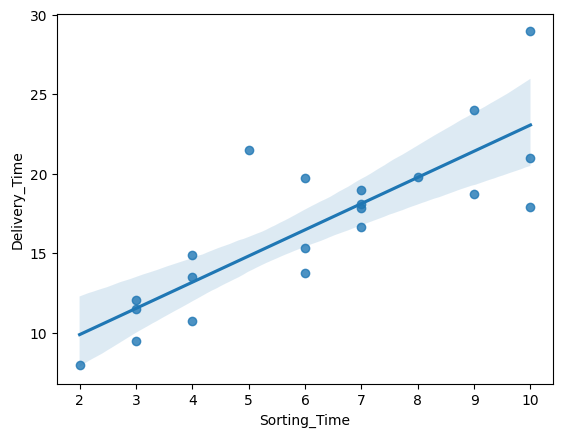

In [44]:
# regression plot
sns.regplot(x=dataset1['Sorting_Time'],y=dataset1['Delivery_Time'])

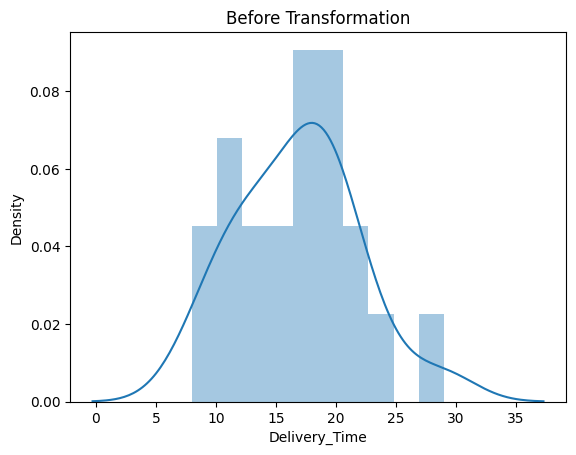

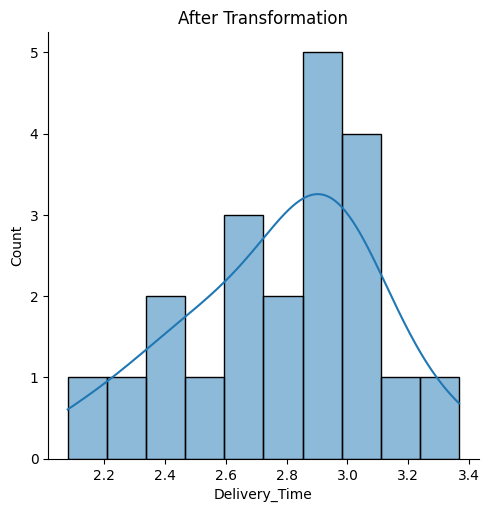

In [53]:
# Creating distplot for the dataset1
sns.distplot(dataset1['Delivery_Time'],bins=10,kde=True)
plt.title('Before Transformation')
sns.displot(np.log(dataset1['Delivery_Time']),bins=10,kde=True)
plt.title('After Transformation')
plt.show()


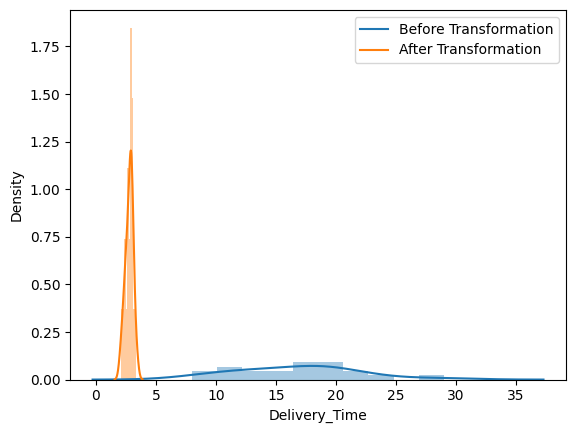

In [51]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset1['Delivery_Time'],bins=10,kde=True)
sns.distplot(np.log(dataset1['Delivery_Time']),bins=10,kde=True)
plt.legend(labels)
plt.show()



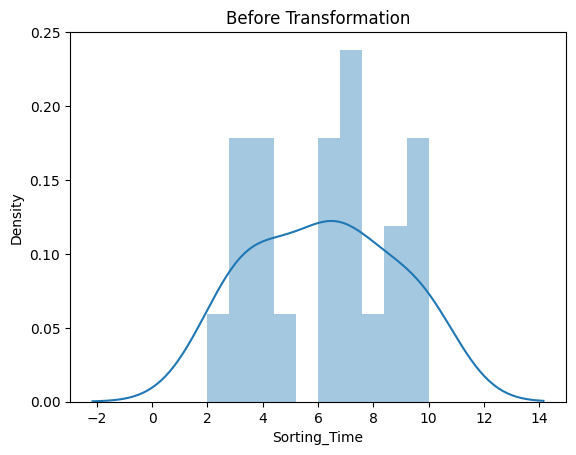

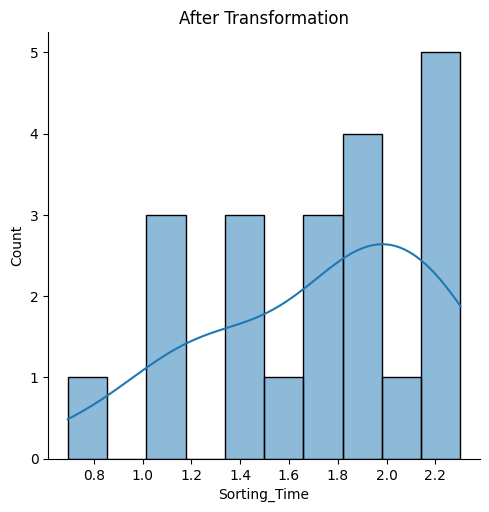

In [54]:
sns.distplot(dataset1['Sorting_Time'],bins=10,kde=True)
plt.title('Before Transformation')
sns.displot(np.log(dataset1['Sorting_Time']),bins=10,kde=True)
plt.title('After Transformation')
plt.show()

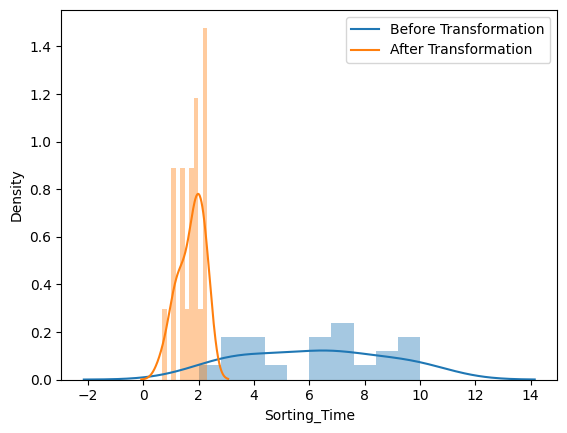

In [56]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset1['Sorting_Time'],bins=10,kde=True)
sns.distplot(np.log(dataset1['Sorting_Time']),bins=10,kde=True)
plt.legend(labels)
plt.show()

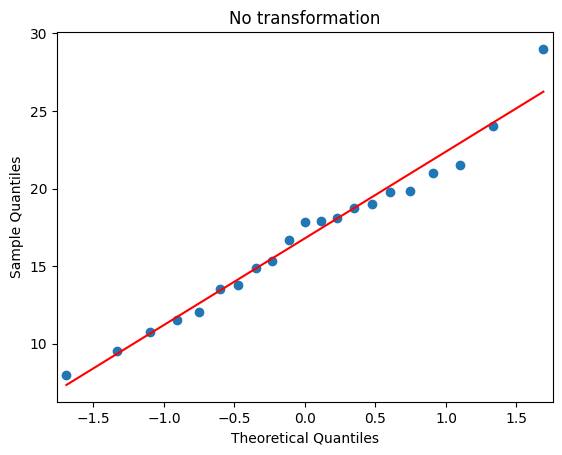

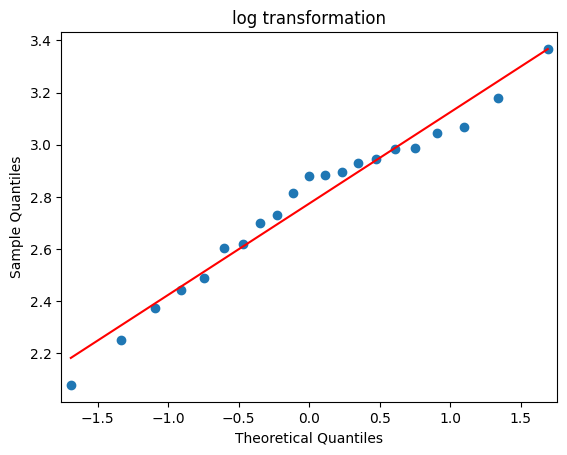

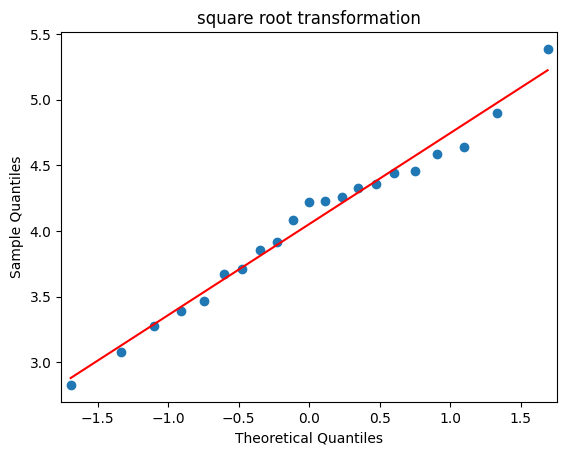

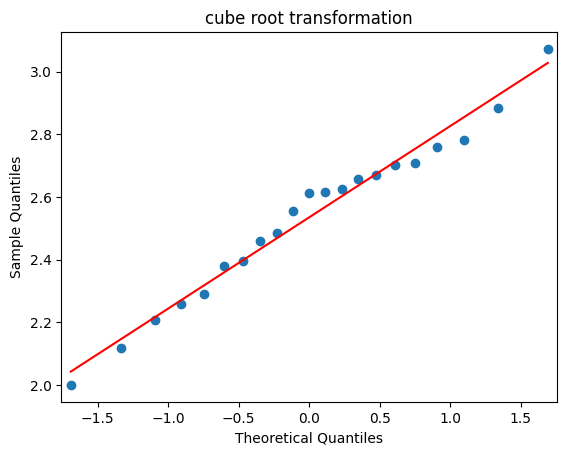

In [57]:
smf.qqplot(dataset1['Delivery_Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset1['Delivery_Time']),line='r')
plt.title('log transformation')
smf.qqplot(np.sqrt(dataset1['Delivery_Time']),line='r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(dataset1['Delivery_Time']),line='r')
plt.title('cube root transformation')
plt.show()

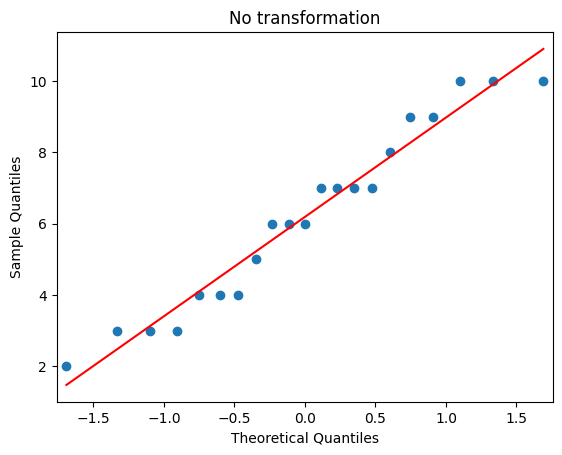

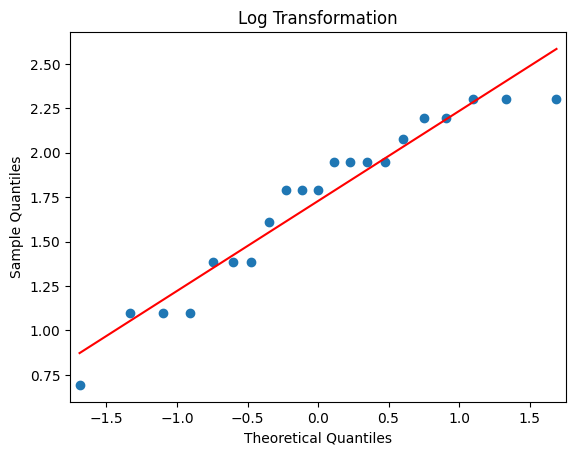

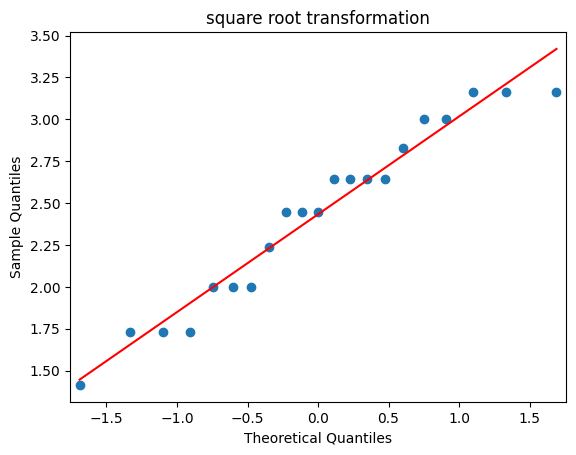

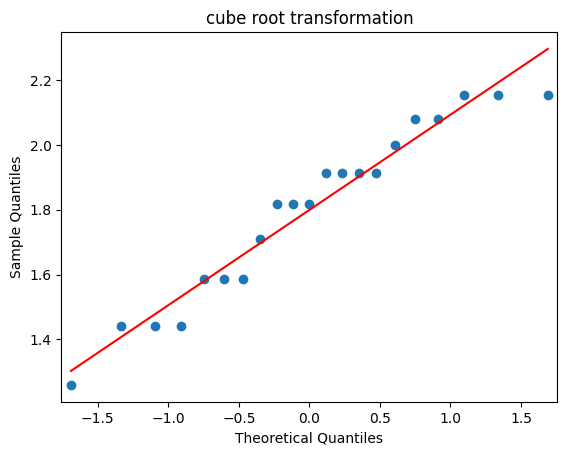

In [58]:
smf.qqplot(dataset1['Sorting_Time'],line='r')
plt.title('No transformation')
smf.qqplot(np.log(dataset1['Sorting_Time']),line='r')
plt.title('Log Transformation')
smf.qqplot(np.sqrt(dataset1['Sorting_Time']),line='r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(dataset1['Sorting_Time']),line='r')
plt.title('cube root transformation')
plt.show()

In [59]:
dataset1.var()

Delivery_Time    25.754619
Sorting_Time      6.461905
dtype: float64

In [61]:
model = sm.ols('Delivery_Time~Sorting_Time',data=dataset1).fit()

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        06:47:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:

model1=sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)',data=dataset1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Thu, 14 Dec 2023   Prob (F-statistic):           8.48e-07
Time:                            06:48:33   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model2=sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)',data=dataset1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Thu, 14 Dec 2023   Prob (F-statistic):           4.90e-07
Time:                            06:49:06   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model3=sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=dataset1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 14 Dec 2023   Prob (F-statistic):           1.60e-07
Time:                           06:50:00   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

here,intercept(Beta0) value= 6.58

& sorting time(Beta1) value= 1.64

Hypothesis testing of X variable by finding test_stats and P_values for Beta1 i.e if(P_values<0.05; Reject null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [67]:

print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


(Intercept) Beta0: tvalue=3.82 , pvalue=0.001147

(daily) Beta1: tvalue=6.38, pvalue=0.000004

As pvalue(0)<0.05; reject null hyp. thus,X variable(sorting time) has good slope and variance wrt Y variable(Delivery time)

R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

Measure goodness-of-fit by finding rsquared values (percentage of variance)

#Residual analysis

Test for Normality of Residuals (qq plot)

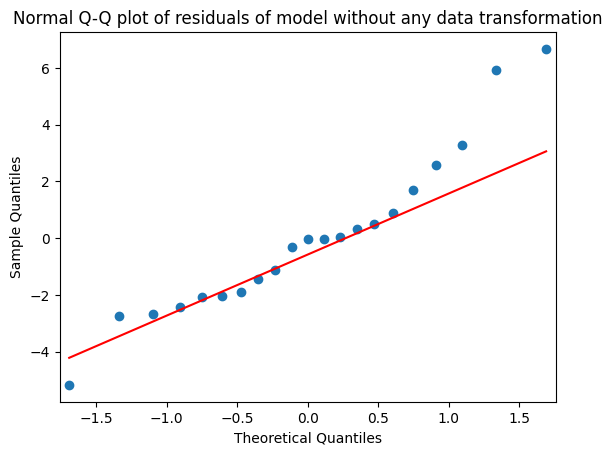

In [68]:
import statsmodels.api as sm
sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals of model without any data transformation')
plt.show()



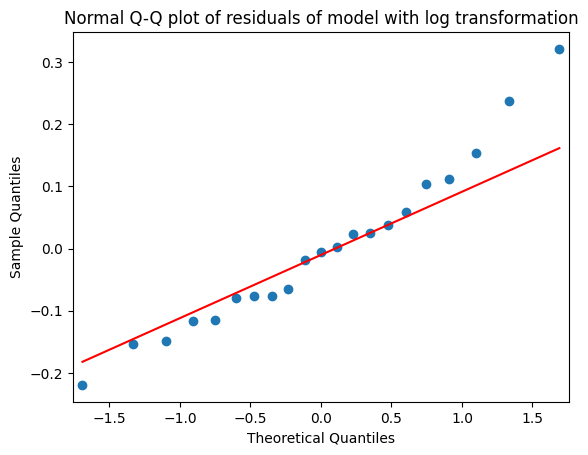

In [69]:

sm.qqplot(model2.resid, line='q')
plt.title('Normal Q-Q plot of residuals of model with log transformation')
plt.show()

In [74]:
# Split the data into training and testing sets
X = dataset1[['Sorting_Time']]
y = dataset1['Delivery_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mean Squared Error: 14.04673895663505
R-squared: -1.020759958636741


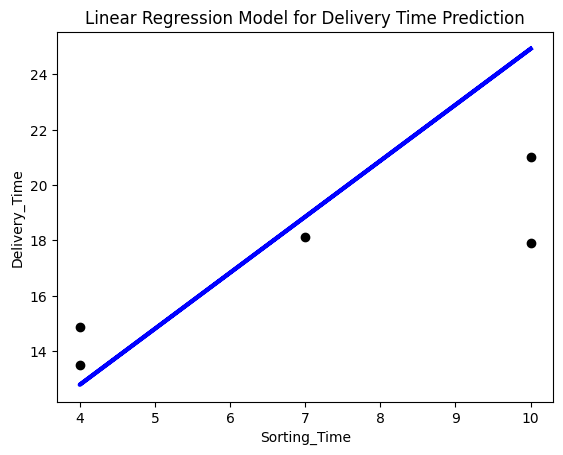

In [75]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression Model for Delivery Time Prediction')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.show()


#predicting the values from model with log transformation on the data

In [77]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = dataset1['Sorting_Time']
predicted['Delivery_Time'] = dataset1['Delivery_Time']
predicted['predicted_delivery_time'] = pd.DataFrame(np.exp(model2.predict(predicted['Sorting_Time'])))

# Display the DataFrame
predicted.head()


,Sorting_Time,Delivery_Time,predicted_delivery_time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997


In [80]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time']=dataset1['Sorting_Time']
predicted1['Delivery_Time']=dataset1['Delivery_Time']
predicted1['predicted_delivery_time']=pd.DataFrame(np.exp(model3.predict(predicted1['Sorting_Time'])))
predicted1

,Sorting_Time,Delivery_Time,predicted_delivery_time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [82]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [129]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [84]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [85]:
dataset2 = pd.read_csv('Salary_Data.csv')

In [86]:
dataset2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [87]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [88]:
dataset2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [89]:
dataset2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [93]:
# Assuming your DataFrame is named 'dataset2'
dataset2 = dataset2.rename(columns={'YearsExperience': 'Years_Experience', 'salary': 'Salary'})
dataset2

,Years_Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#EDA and Visualization

In [94]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Years_Experience  30 non-null     float64
 1   Salary            30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [95]:
dataset2.head()

,Years_Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [96]:
dataset2.describe()

,Years_Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Checking for Null values

In [97]:
dataset2.isnull().sum()

Years_Experience    0
Salary              0
dtype: int64

Checking for Duplicate Values

In [98]:
dataset2[dataset2.duplicated()].shape

(0, 2)

In [99]:
dataset2[dataset2.duplicated()]

,Years_Experience,Salary


Visualization

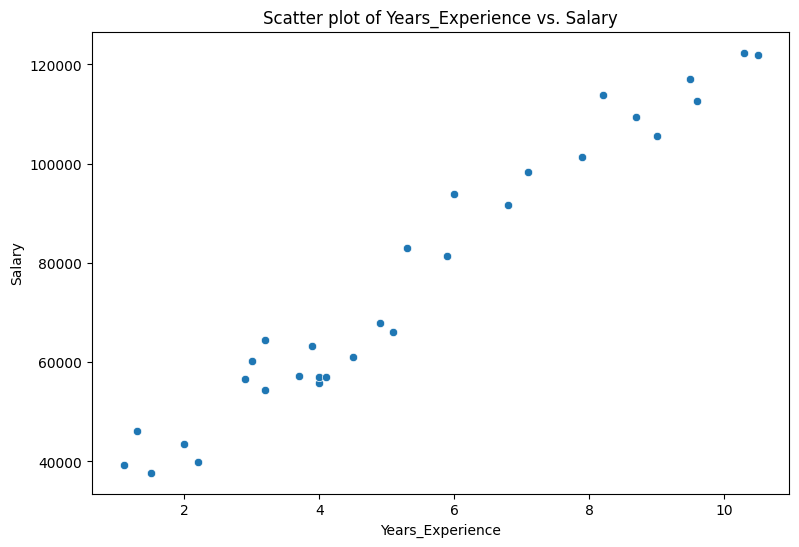

In [100]:
# Scatter plot for Sorting_Time vs. Delivery_Time
plt.figure(figsize = (9,6))
sns.scatterplot(x='Years_Experience', y='Salary', data=dataset2, palette='viridis')
plt.title('Scatter plot of Years_Experience vs. Salary')
plt.xlabel('Years_Experience')
plt.ylabel('Salary')
plt.show()

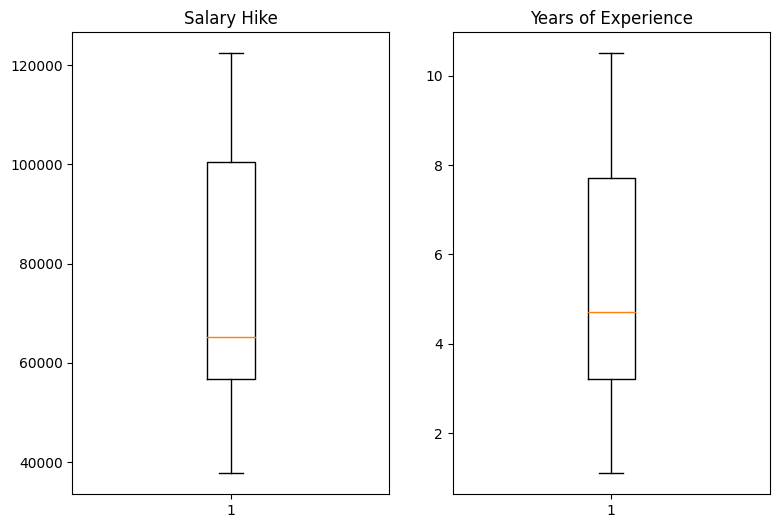

In [101]:
# creating Boxplot for Sorting_Time vs. Delivery_Time
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dataset2['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(dataset2['Years_Experience'])
plt.title('Years of Experience')
plt.show()

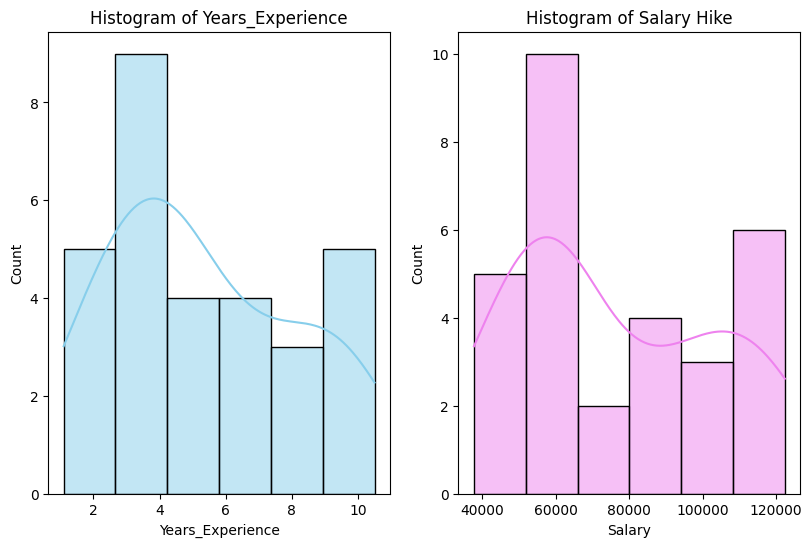

In [102]:
# Create histograms for Sorting_Time, Delivery_Time
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
sns.histplot(dataset2['Years_Experience'], kde=True, color='skyblue')
plt.title('Histogram of Years_Experience')
plt.subplot(1,3,2)
sns.histplot(dataset2['Salary'],kde=True, color='violet')
plt.title('Histogram of Salary Hike')
plt.show()

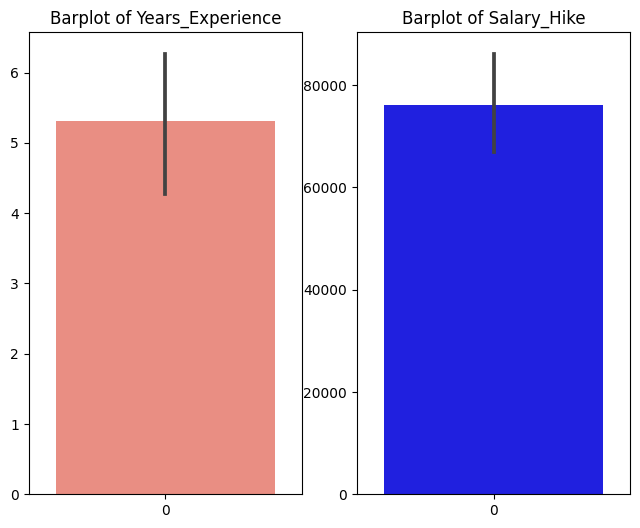

In [103]:
# Create Barchart for Sorting_Time, Delivery_Time
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot(dataset2['Years_Experience'], color='salmon')
plt.title('Barplot of Years_Experience')
plt.subplot(1,3,2)
sns.barplot(dataset2['Salary'], color='Blue')
plt.title('Barplot of Salary_Hike')
plt.show()

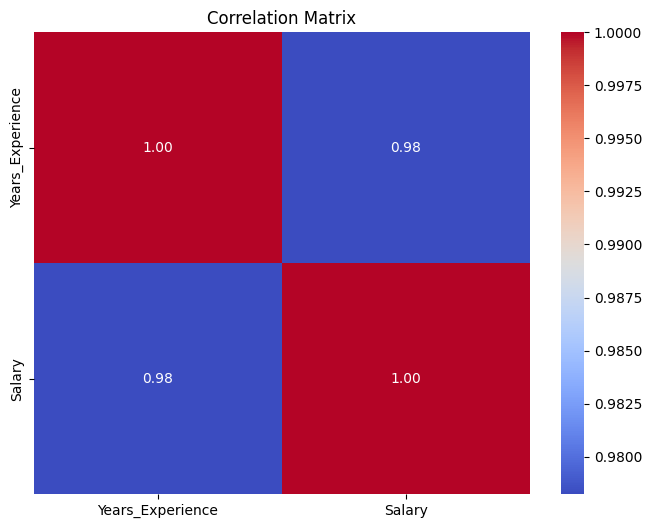

In [104]:
# Correlation heatmap
correlation_matrix = dataset2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

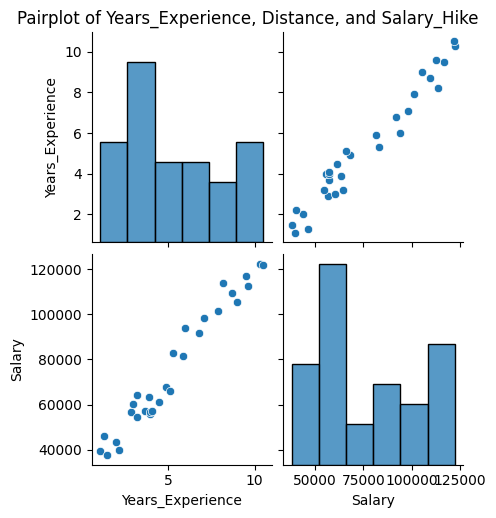

In [106]:
# Pairplot to visualize relationships between variables
sns.pairplot(dataset2, height=2.5)
plt.suptitle('Pairplot of Years_Experience, Distance, and Salary_Hike', y=1.02)
plt.show()

<Axes: xlabel='Years_Experience', ylabel='Salary'>

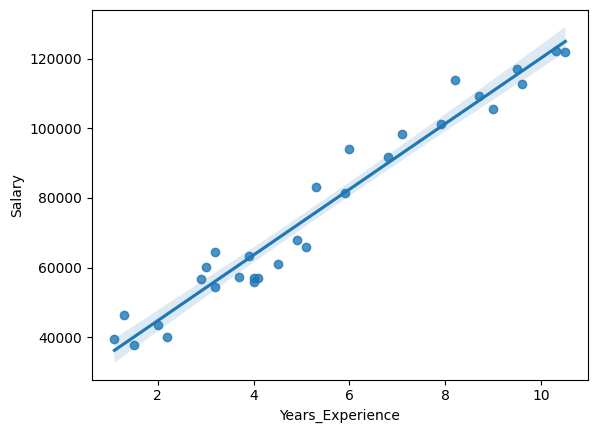

In [109]:
# regression plot
sns.regplot(x=dataset2['Years_Experience'],y=dataset2['Salary'])

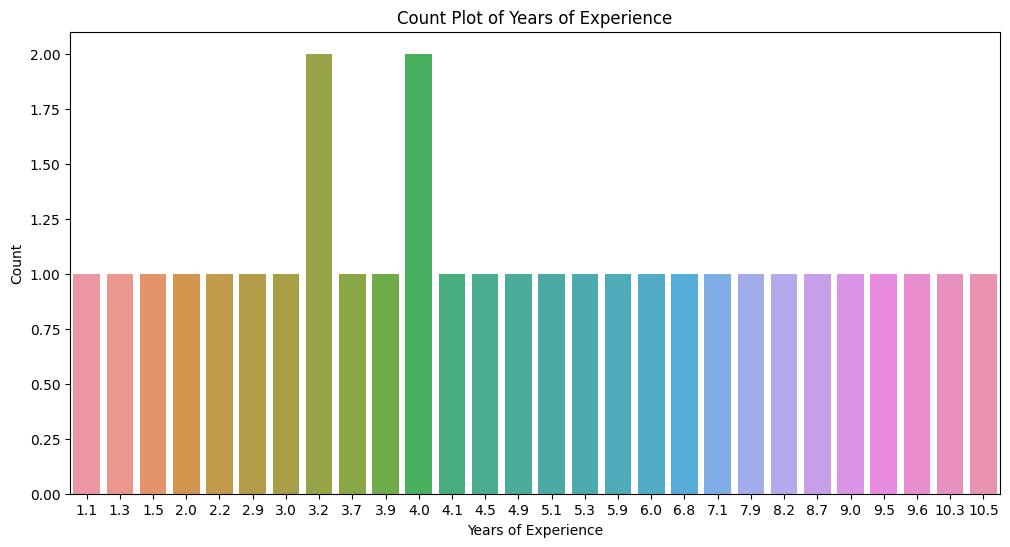

In [113]:
# countplot
plt.figure(figsize=(12,6))
sns.countplot(x='Years_Experience', data=dataset2)
plt.title('Count Plot of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

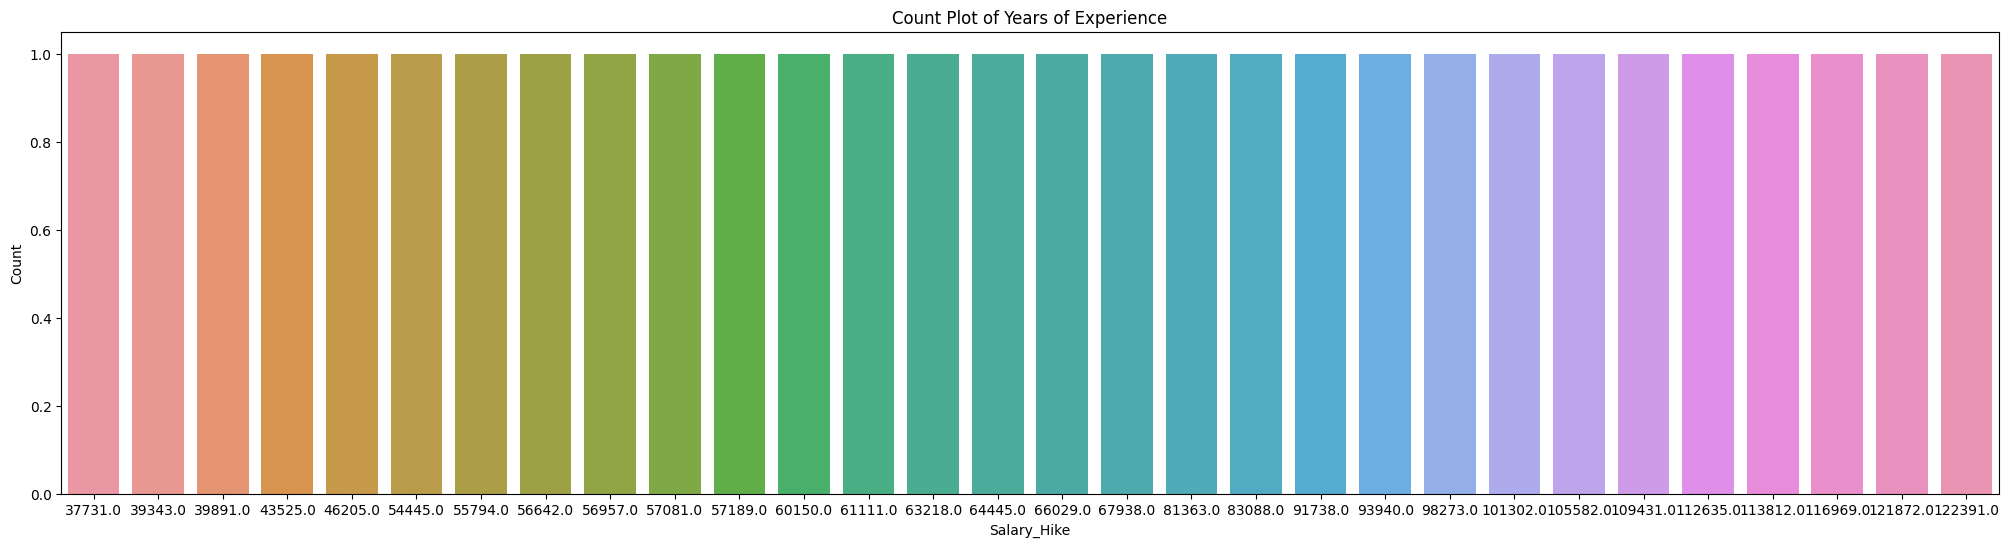

In [116]:
# countplot
plt.figure(figsize=(25,6))
sns.countplot(x='Salary', data=dataset2)
plt.title('Count Plot of Years of Experience')
plt.xlabel('Salary_Hike')
plt.ylabel('Count')
plt.show()

Checking corellation between variables

In [117]:
dataset2.corr()

,Years_Experience,Salary
Years_Experience,1.000000,0.978242
Salary,0.978242,1.000000


Visualization of Correlation beteen x and y
regplot = regression plot

<Axes: xlabel='Years_Experience', ylabel='Salary'>

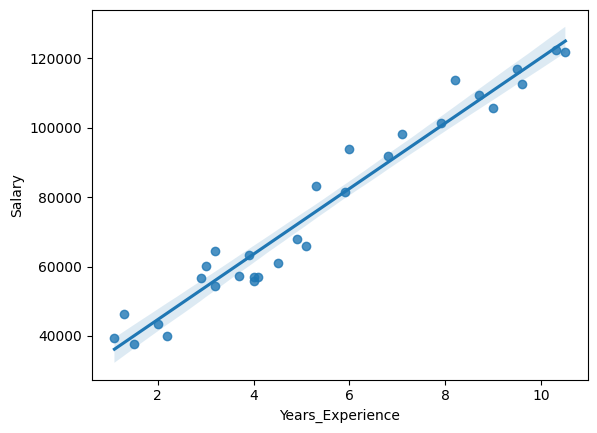

In [119]:
sns.regplot(x=dataset2['Years_Experience'],y=dataset2['Salary'])

Checking for Homoscedasticity or Hetroscedasticity

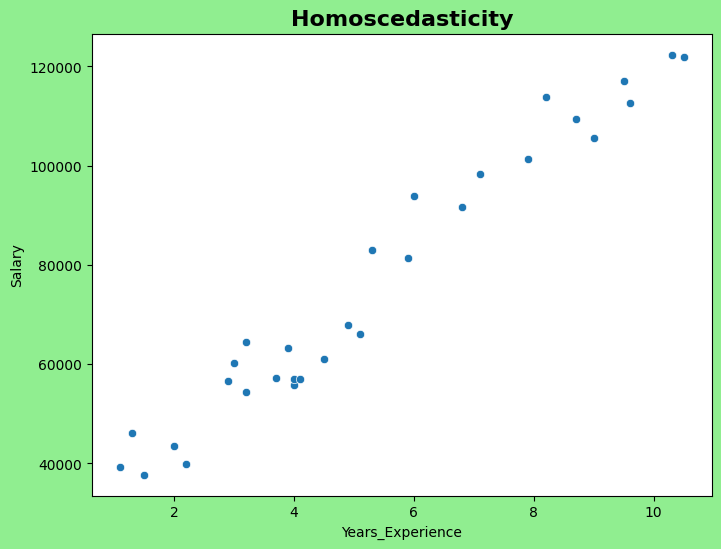

In [120]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = dataset2['Years_Experience'], y = dataset2['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

As you can see in above graph
It shows as the Salary Increases the Years of Experience increases variation is ocnstant along the way in data
The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity

In [121]:
dataset2.var()

Years_Experience    8.053609e+00
Salary              7.515510e+08
dtype: float64

#Feature Engineering

Trying different transformation of data to estimate normal distribution and remove any skewness

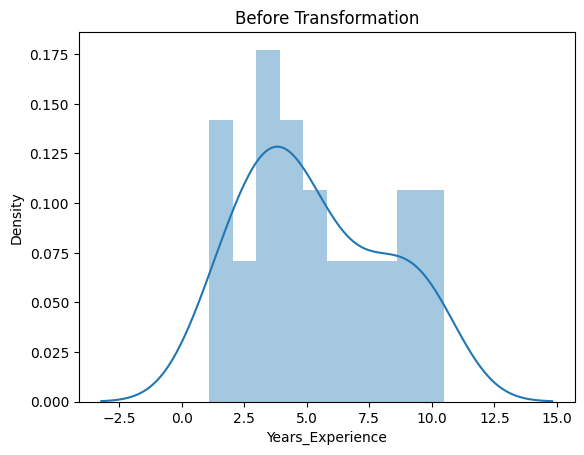

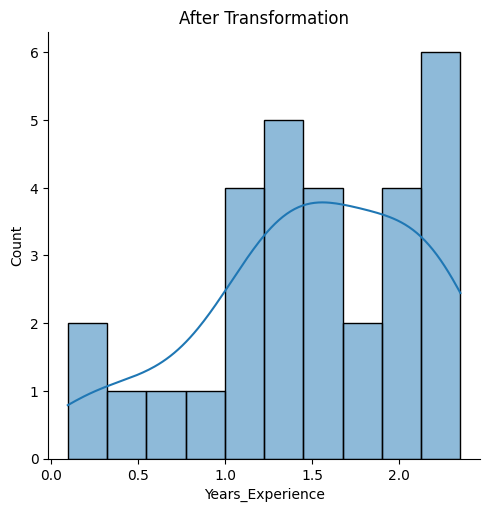

In [123]:
sns.distplot(dataset2['Years_Experience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dataset2['Years_Experience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

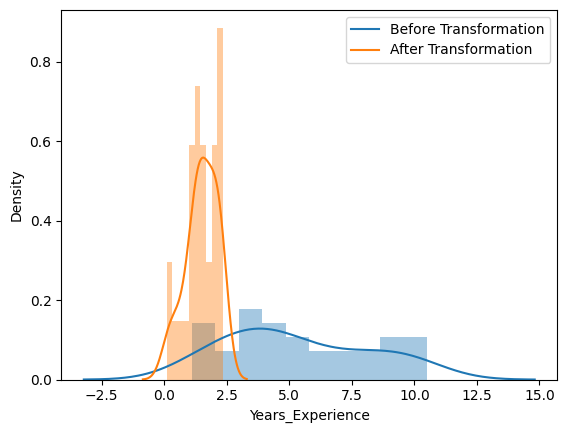

In [124]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset2['Years_Experience'], bins = 10, kde = True)
sns.distplot(np.log(dataset2['Years_Experience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

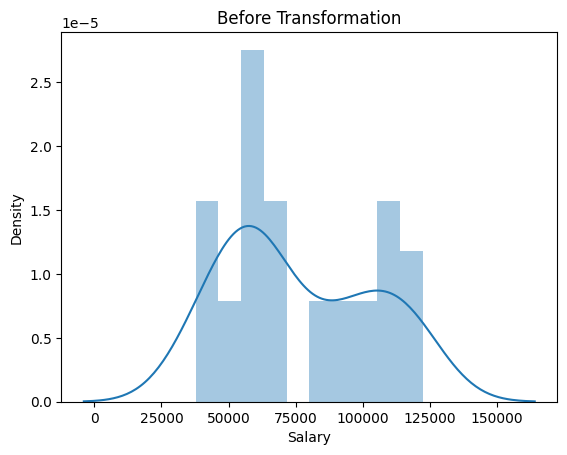

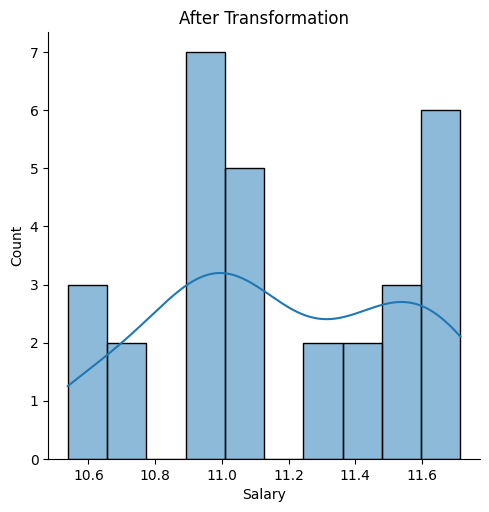

In [125]:
sns.distplot(dataset2['Salary'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dataset2['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

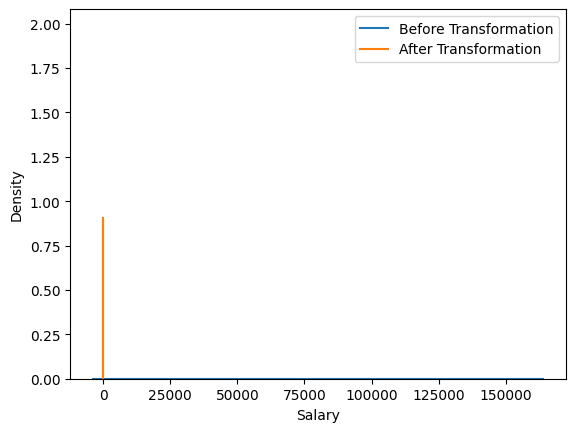

In [126]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset2['Salary'], bins = 10, kde = True)
sns.distplot(np.log(dataset2['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

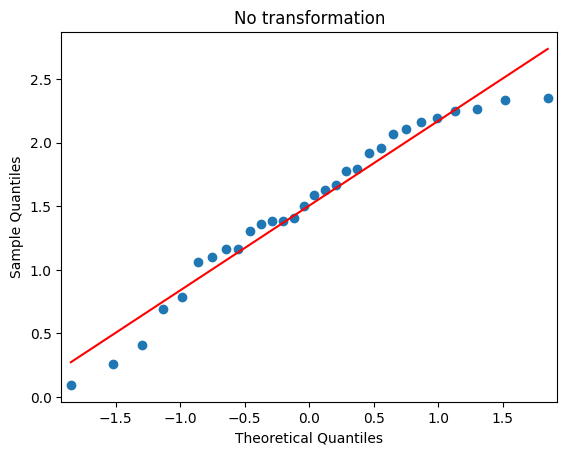

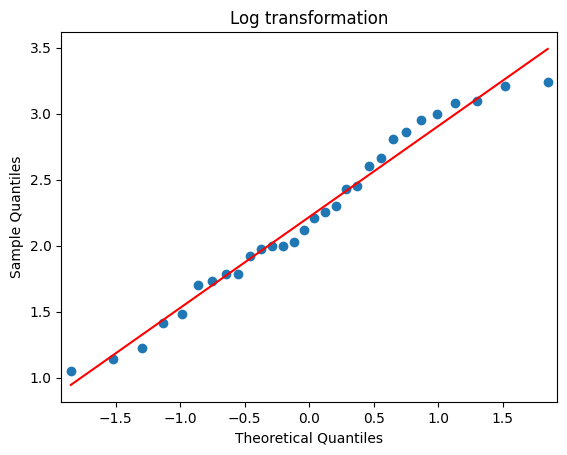

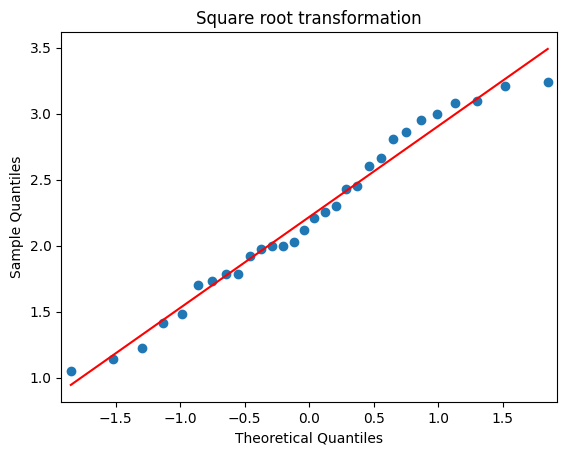

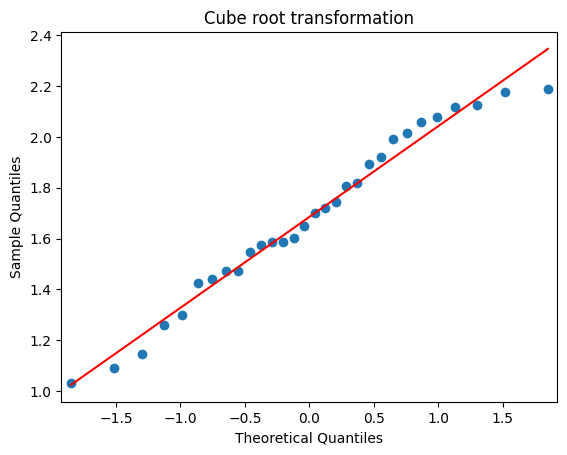

In [127]:
smf.qqplot(np.log(dataset2['Years_Experience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(dataset2['Years_Experience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset2['Years_Experience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset2['Years_Experience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

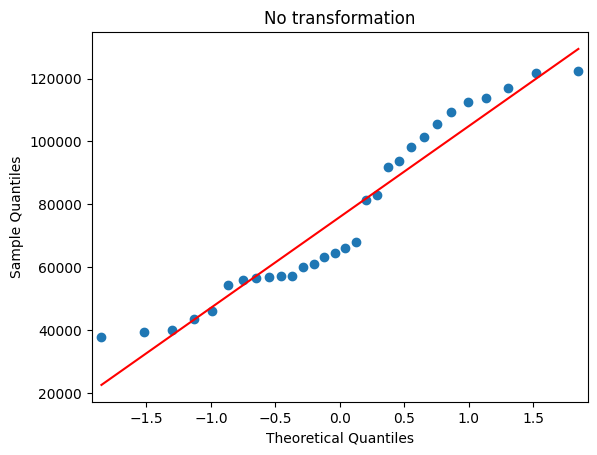

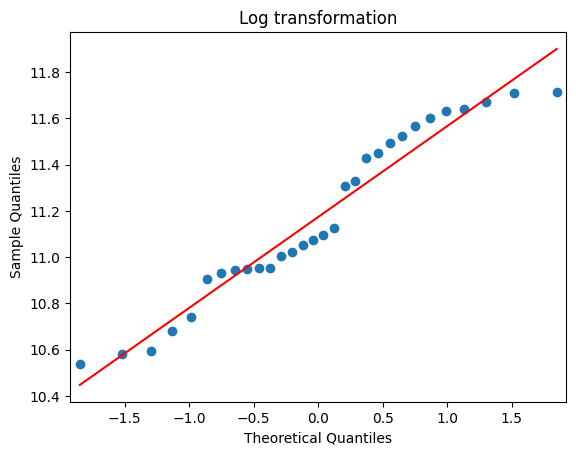

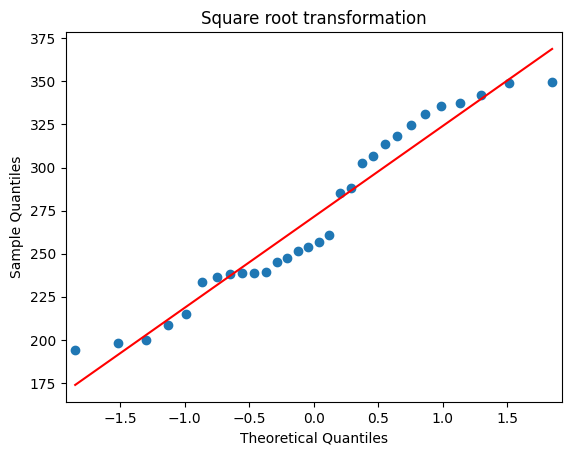

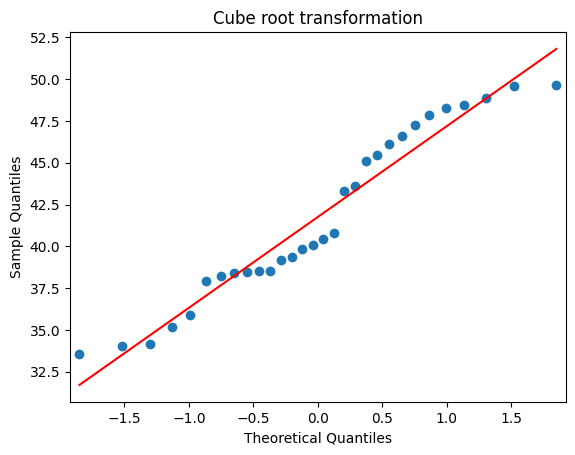

In [128]:
smf.qqplot(dataset2['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset2['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset2['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset2['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression
It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [130]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~Years_Experience', data = dataset2).fit()

In [133]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        08:47:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Years_Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model
The R-squared and Adjusted R-squared scores are above 0.85.
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
F-statitics is quite high as well and yes desire it to be higher
But log-likelihood is quite very low far away from 0
and AIC and BIC score are much higher for this model
Lets Try some data transformation to check whether these scores can get any better than this.

Square Root transformation on data

In [134]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(Years_Experience)', data = dataset2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           7.58e-19
Time:                        08:48:26   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(Years_Experience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model
The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
F-statitics has gotten a little lower for this model than previous.
But log-likelihood got better than before close to 0 higher than previous model
and AIC and BIC score are now much better for this model
Lets Try some data transformation to check whether these scores can get any better than this.

#Cuberoot transformation on Data

In [135]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(Years_Experience)', data = dataset2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           6.37e-18
Time:                        08:49:17   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(Years_Experience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Log transformation on Data

In [136]:
model3 = sm.ols('np.log(Salary)~np.log(Years_Experience)', data = dataset2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           7.40e-16
Time:                        08:49:52   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.3280      0.056    184.868      0.000      10.214      10.442
np.log(Years_Experience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Model Testing

In [137]:
model.params

Intercept           25792.200199
Years_Experience     9449.962321
dtype: float64

Here, (Intercept) Beta0 value = 25792.20 & (YearsExperience) Beta1 value = 9449.96
Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [138]:
print(model.tvalues,'\n',model.pvalues)

Intercept           11.346940
Years_Experience    24.950094
dtype: float64 
 Intercept           5.511950e-12
Years_Experience    1.143068e-20
dtype: float64


In [139]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%

#Residual Analysis
Test for Normality of Residuals (Q-Q Plot)

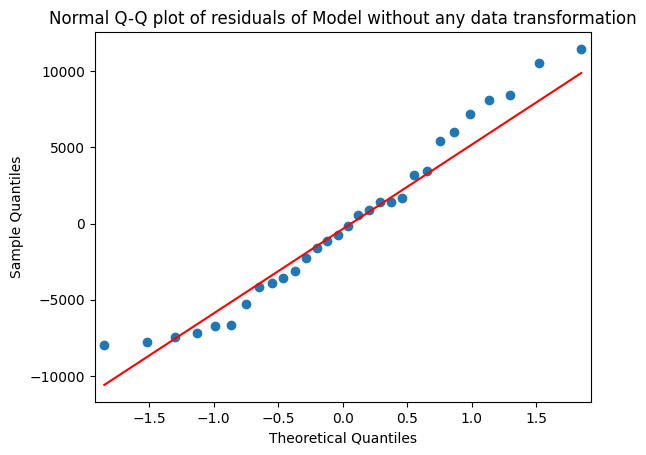

In [143]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

As you can notice in the above plot
The first model follows normal distribution

Residual Plot to check Homoscedasticity or Hetroscedasticity

In [144]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

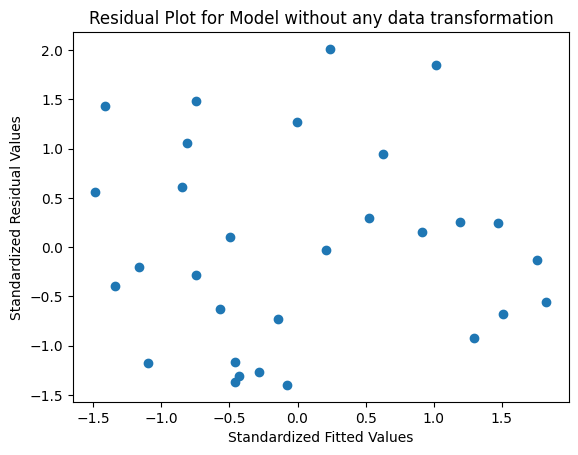

In [145]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Comparing different models with respect to the Root Mean Squared Errors


In [146]:
from sklearn.metrics import mean_squared_error
model1_pred_y =np.square(model1.predict(dataset2['Years_Experience']))
model2_pred_y =pow(model2.predict(dataset2['Years_Experience']),3)
model3_pred_y =np.exp(model3.predict(dataset2['Years_Experience']))

In [150]:
model1_rmse =np.sqrt(mean_squared_error(dataset2['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(dataset2['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(dataset2['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174318 
model2= 6232.815455835847 
model3= 7219.716974372806


In [151]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

#Predicting values

In [159]:

# Assuming 'model' is your trained linear regression model
predicted2 = pd.DataFrame()
predicted2['Years_Experience'] = dataset2['Years_Experience']
predicted2['Salary'] = dataset2['Salary']
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted2[['Years_Experience']]))

# Display the DataFrame with actual and predicted values
print(predicted2)


    Years_Experience    Salary  Predicted_Salary_Hike
0                1.1   39343.0           36187.158752
1                1.3   46205.0           38077.151217
2                1.5   37731.0           39967.143681
3                2.0   43525.0           44692.124842
4                2.2   39891.0           46582.117306
5                2.9   56642.0           53197.090931
6                3.0   60150.0           54142.087163
7                3.2   54445.0           56032.079627
8                3.2   64445.0           56032.079627
9                3.7   57189.0           60757.060788
10               3.9   63218.0           62647.053252
11               4.0   55794.0           63592.049484
12               4.0   56957.0           63592.049484
13               4.1   57081.0           64537.045717
14               4.5   61111.0           68317.030645
15               4.9   67938.0           72097.015574
16               5.1   66029.0           73987.008038
17               5.3   83088